# MIS: Clase complementaria 5

In [67]:
import numpy as np 
import networkx as nx
import itertools as it
import time

#### Repaso

-------Definición Redes:-------

Dada una red (N,G) con N un conjunto de nodos y G un conjunto de enlaces. O alternativamente, dada una red (N,g) con N un conjunto de nodos y g una matriz de adyacencia.

u_i(g) = "Utilidad que recibe el agente i de la estructura de la red g". Note que u_i(g): Redes(n)->R

Si |N|=n, llamemos al conjunto de todas las redes Redes(n) := M_{nxn}({1,0})

-------Definición Eficiencia-------

g es eficiente (socialmente) si g maximiza la utilidad social (utilitarista). ¿Cómo planteo esto?

g es eficiente ssi g = argmax{g´ \in Redes(n)} U(g). Aquí, U:Redes -> R y se puede ver así: Tome S:Redes(n)->R^n, dada por S(g) = (u_1(g),u_2(g),...,u_n(g)). 

Además, tome F:R^n->R dada por F(x_1,...,x_n) = x_1 + x_2 + ... + x_n. Así, U = F°S.

-------Definición Eficiencia Paretiana-------

g es pareto eficiente (eficiente en el sentido de Pareto) si no existe otra red que mejore estrictamente a un agente y no empeore a los demás.

¿Qué quiere decir lo anterior?

g es pareto eficiente ssi para toda g' NO se cumplen las siguientes condiciones:

1) Hay un i para el cual u_i(g´)>u_i(g).

2) Para todo j u_j(g´)>=u_j(g)

¿Cómo testear esto?

-------Definición Equilibrio-------

Una red se considera en un equilibrio (de Nash si se quiere, extendido a redes obviamente) si es estable por pares. Dado (N,G), sean i,j agentes con i distinto de j. 

La estabilidad por pares se define por:

1) No es cierto que exista un i, tal que (i,j) está en G, para el cual u_i(G\ {(i,j)}) > u_i(G). Aterrizando esto: Para todo i es cierto que u_i(G)>=u_i(G\ {(i,j)})      

2) No es cierto que existan i,j, tales que (i,j) no está en G, para los cuales u_k(G u {(i,j)}) > u_k(G), con k = i,j. Aterrizando esto: Para todo i,j es cierto que u_k(G)>=u_k(G u {(i,j)})  

#### Block and Jackson

Trataremos de montar el modelo y luego analizarlo. Primero, qué significa cada cosa:

1) b(k)>b(k+1). ¿Cómo generalizarla?

2) c>=0. ¿Qué significa?

3) ¿Qué significa tener conexiones simétricas? ¿Qué es \delta? ¿Por qué \delta está en (0,1)?

In [68]:
def generador_recorridos(Conj_SP):
    Nodes = Conj_SP.keys() # Extraigo el conjunto de nodos
    Suma_Sobre = {} 
    for i in Nodes:
        listado = []
        for j in Nodes:
            if i!=j:
                if Conj_SP[i][j]>0:
                    listado.append(j)
        Suma_Sobre[i] = listado
    return Suma_Sobre

In [69]:
def suma_utilidad_i(nodo,Suma_Sobre,Conj_SP,bfun,grados,constant):
    utilidad_i = 0
    if len(Suma_Sobre[nodo])>0:
        for j in Suma_Sobre[nodo]:
            utilidad_i+=bfun(Conj_SP[nodo][j])
    utilidad_i-=grados[nodo]
    return utilidad_i 

In [70]:
# Función de utilidad generica que nos permite generar las utilidades relevantes
def utility_function(grafo,bfun,constant):
    #grafo = G
    Conj_SP = dict(nx.shortest_path_length(grafo)) # Creo los shortest path
    Grados = dict(nx.degree(grafo)) # Creo los grados de los nodos
    Recorrido = generador_recorridos(Conj_SP) # Creo los recorridos factibles
    Utilidades = {i:suma_utilidad_i(i,Recorrido,Conj_SP,bfun,Grados,constant) for i in Conj_SP}
    return Utilidades
    
# Esta funcion crea un diccionario con llaves = nodos i y valores = U_i(grafo)

In [71]:
# Para el modelo de conexiones simétricas
def bfun_simetricas(long_sp,delta = 0.99):
    if (delta>0) & (delta<1):
        return delta**long_sp
    else:
        raise Exception("Introduzca argumento delta correcto")


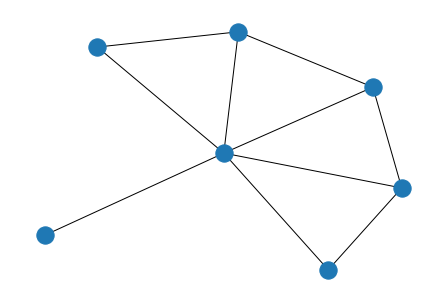

In [72]:
# Vamos a probar!
# Creamos el grafo
G = nx.erdos_renyi_graph(7,0.5)
# Eliminar "self-loops"
G.remove_edges_from(nx.selfloop_edges(G))
nx.draw(G)

In [73]:
# Se generan las utilidades según el modelo
Utilidades = utility_function(grafo = G,bfun = bfun_simetricas,constant = 0.5)
print(Utilidades)
# Se agregan como atributos de los nodos
nx.set_node_attributes(G,Utilidades,"Utilidad")

{0: 3.9004000000000003, 1: 3.9004000000000003, 2: -0.05999999999999961, 3: 2.9103000000000003, 4: 4.8905, 5: 2.9103000000000003, 6: 2.9103000000000003}


In [74]:
# Se revisa que todo esté bien 
G.nodes[0]["Utilidad"]

3.9004000000000003

#### Actividad:

Opción 1) Realicen el planteamiento del modelo de coautores.

Opción 2) Les doy ayuditas con el taller.

#### Otros importantes:

1) Matriz de Insumo Producto Dane.

2) ¿Algo más que se les ocurra?